In [1]:
import os
import numpy as np
from pathlib import Path
from utils.data_util import *
from lr import LogisticRegression as LR
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# This command will basically import all the modules from pycaret that are necessary for classification tasks
from pycaret.classification import *

In [2]:
BASE_PATH = '/home/karim/Interviews/Celonis/data/structured'
gesture_1 = extract_gesture(BASE_PATH + '/U1/')
gesture_2 = extract_gesture(BASE_PATH + '/U2/')
gesture_3 = extract_gesture(BASE_PATH + '/U3/')
gesture_4 = extract_gesture(BASE_PATH + '/U4/')
gesture_5 = extract_gesture(BASE_PATH + '/U5/')
gesture_6 = extract_gesture(BASE_PATH + '/U6/')
gesture_7 = extract_gesture(BASE_PATH + '/U7/')
gesture_8 = extract_gesture(BASE_PATH + '/U8/')

X, y = create_dataset([gesture_1, gesture_2, gesture_3, gesture_4, gesture_5, gesture_6, gesture_7, gesture_8], shuffle=True)
print(X.shape, y.shape)

<generator object Path.rglob at 0x7fc2982127b0>
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration6-3.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration8-4.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration8-8.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration6-8.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration3-4.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration5-5.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration6-10.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration2-4.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration7-10.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_Acceleration2-10.txt
/home/karim/Interviews/Celonis/data/structured/U1/U1 (3)/A_Template_A

/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration6-3.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration1-4.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration3-3.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration8-2.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration5-7.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration5-4.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration8-5.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration1-3.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration2-3.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration4-10.txt
/home/karim/Interviews/Celonis/data/structured/U2/U2 (2)/C_Template_Acceleration7-5.txt
/home/karim/Interviews/Celonis/

/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration3-7.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration1-1.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration8-8.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration4-3.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration3-2.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration4-7.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration3-1.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration3-4.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration3-3.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration6-2.txt
/home/karim/Interviews/Celonis/data/structured/U4/U4 (1)/H_Template_Acceleration2-8.txt
/home/karim/Interviews/Celonis/d

/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration7-3.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration1-9.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration5-4.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration1-8.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration5-8.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration8-8.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration5-3.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration3-9.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration4-4.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration3-2.txt
/home/karim/Interviews/Celonis/data/structured/U6/U6 (3)/M_Template_Acceleration7-1.txt
/home/karim/Interviews/Celonis/d

/home/karim/Interviews/Celonis/data/structured/U8/U8 (7)/Z_Template_Acceleration3-6.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration4-1.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration4-4.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration2-10.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration3-4.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration2-9.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration2-8.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration7-2.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration7-4.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration5-3.txt
/home/karim/Interviews/Celonis/data/structured/U8/U8 (2)/Z_Template_Acceleration7-6.txt
/home/karim/Interviews/Celonis/

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
import pandas as pd
df = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train, columns=['gesture'])
X_train = pd.concat([df, y_train], ignore_index=False, axis=1).reset_index(drop=True)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,gesture
0,0.115385,0.115385,0.115385,0.115385,0.115385,0.115385,0.115385,0.115385,0.115385,0.115385,0.076923,0.076923,0.000000,0.038462,0.076923,0.153846,0.192308,0.192308,0.076923,-0.115385,-0.230769,-0.115385,-0.038462,0.038462,0.076923,0.076923,0.000000,0.000000,-0.115385,-0.153846,-0.115385,0.000000,0.076923,0.192308,0.269231,0.307692,0.269231,0.230769,0.192308,0.153846,0.115385,0.153846,0.230769,0.192308,0.192308,0.153846,0.115385,0.115385,0.153846,0.192308,0.230769,0.269231,0.230769,0.153846,0.076923,0.038462,-0.038462,-0.038462,0.115385,0.230769,0.307692,0.269231,0.115385,0.000000,-0.076923,-0.076923,0.076923,0.153846,0.115385,0.076923,-0.038462,0.076923,0.230769,0.307692,0.269231,0.153846,0.000000,-0.038462,0.000000,0.153846,0.192308,0.307692,0.346154,0.307692,0.346154,0.346154,0.269231,0.115385,0.000000,0.038462,0.230769,0.307692,0.346154,0.269231,0.269231,0.346154,0.384615,0.346154,0.269231,0.192308,0.076923,0.076923,0.115385,0.192308,0.307692,0.423077,0.461539,0.346154,0.115385,0.000000,0.000000,0.076923,0.153846,0.153846,0.115385,0.115385,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.52,0.48,0.52,0.52,0.48,0.56,0.56,0.48,0.48,0.56,0.

In [5]:
import pandas as pd
df = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test, columns=['gesture'])
X_test = pd.concat([df, y_test], ignore_index=False, axis=1).reset_index(drop=True)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,gesture
0,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.038462,0.000000,0.000000,-0.038462,-0.076923,-0.115385,-0.076923,-0.038462,0.000000,0.038462,0.038462,0.038462,0.038462,0.038462,0.038462,0.000000,0.000000,-0.038462,0.000000,0.000000,0.000000,0.038462,0.038462,-0.038462,-0.115385,-0.230769,-0.307692,-0.346154,-0.346154,-0.346154,-0.346154,-0.346154,-0.346154,-0.384615,-0.461539,-0.500000,-0.461539,-0.346154,-0.230769,-0.115385,-0.076923,-0.076923,-0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [6]:
# Setting up the classifier
# Pass the complete dataset as data and the featured to be predicted as target
clf=setup(data=X_train, target='gesture')

,Description,Value
0,session_id,8877
1,Target,gesture
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(3136, 943)"
5,Missing Values,0
6,Numeric Features,936
7,Categorical Features,6
8,Ordinal Features,0
9,High Cardinality Features,0


In [7]:
# This model will be used to compare all the model along with the cross validation
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8816,0.9875,0.8817,0.8848,0.8813,0.8646,0.8651,0.1200
rf,Random Forest Classifier,0.8661,0.9839,0.8658,0.8688,0.8654,0.8469,0.8474,0.3280
lightgbm,Light Gradient Boosting Machine,0.8615,0.9849,0.8618,0.8659,0.8617,0.8416,0.8422,1.2480
knn,K Neighbors Classifier,0.7900,0.9592,0.7882,0.8050,0.7884,0.7597,0.7620,0.2810
gbc,Gradient Boosting Classifier,0.7827,0.9678,0.7823,0.7890,0.7822,0.7514,0.7524,6.1930
dt,Decision Tree Classifier,0.6064,0.7748,0.6047,0.6134,0.6063,0.5497,0.5507,0.2470
lr,Logistic Regression,0.5185,0.8619,0.5152,0.5188,0.5151,0.4492,0.4501,0.6250
ada,Ada Boost Classifier,0.4383,0.7793,0.4377,0.4479,0.4337,0.3576,0.3596,0.4740
svm,SVM - Linear Kernel,0.4333,0.0000,0.4310,0.4826,0.4320,0.3521,0.3592,0.2710
ridge,Ridge Classifier,0.4274,0.0000,0.4234,0.4276,0.4211,0.3446,0.3461,0.1930


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=8877, verbose=0,
                     warm_start=False)

In [8]:
et=create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8455,0.9850,0.8473,0.8502,0.8452,0.8234,0.8241
1,0.8500,0.9810,0.8509,0.8536,0.8502,0.8285,0.8290
2,0.9000,0.9909,0.9024,0.9022,0.8982,0.8857,0.8865
3,0.8682,0.9811,0.8689,0.8681,0.8674,0.8493,0.8495
4,0.9091,0.9927,0.9080,0.9095,0.9081,0.8960,0.8964
5,0.8995,0.9919,0.8982,0.9069,0.8988,0.8851,0.8863
6,0.8995,0.9892,0.8997,0.9033,0.9005,0.8851,0.8854
7,0.8676,0.9880,0.8685,0.8704,0.8686,0.8486,0.8487
8,0.9087,0.9886,0.9082,0.9119,0.9083,0.8955,0.8961


In [9]:
# Whenenver we compare different models or build a model, the model uses deault
#hyperparameter values. Hence, we need to tune our model to get better performance

tuned_et=tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6273,0.9230,0.6291,0.6422,0.6222,0.5743,0.5780
1,0.6136,0.9162,0.6174,0.6337,0.6076,0.5589,0.5635
2,0.6500,0.9362,0.6542,0.6535,0.6373,0.6002,0.6040
3,0.6818,0.9339,0.6840,0.7056,0.6741,0.6365,0.6421
4,0.7091,0.9432,0.7123,0.7104,0.6968,0.6676,0.6713
5,0.6164,0.9400,0.6144,0.6458,0.6105,0.5612,0.5663
6,0.6941,0.9425,0.6971,0.7003,0.6914,0.6504,0.6522
7,0.6667,0.9395,0.6679,0.6850,0.6633,0.6191,0.6224
8,0.7078,0.9466,0.7088,0.7287,0.7054,0.6660,0.6697


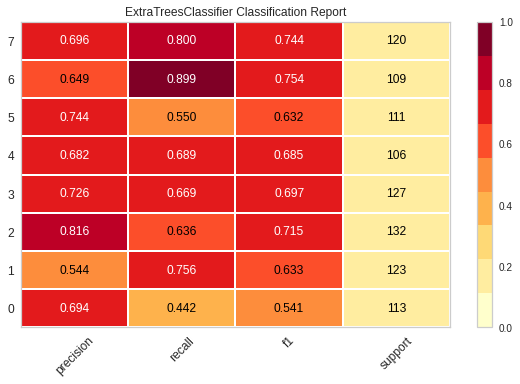

In [10]:
plot_model(tuned_et, plot='class_report')

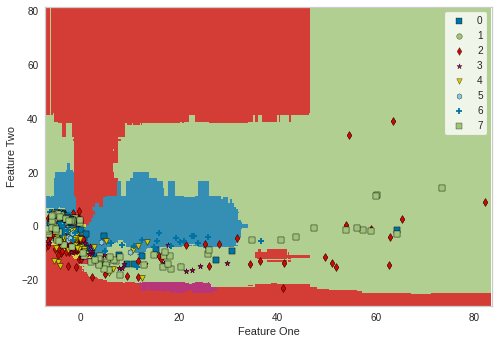

In [11]:
plot_model(tuned_et, plot='boundary')

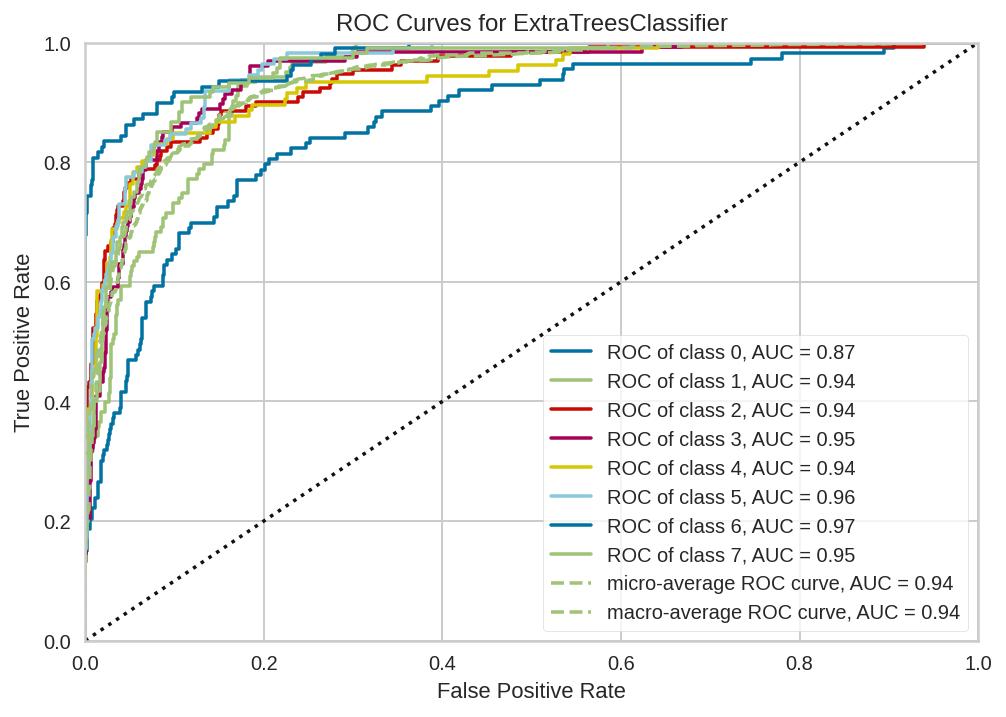

In [12]:
plot_model(tuned_et, plot='auc', scale = 2)

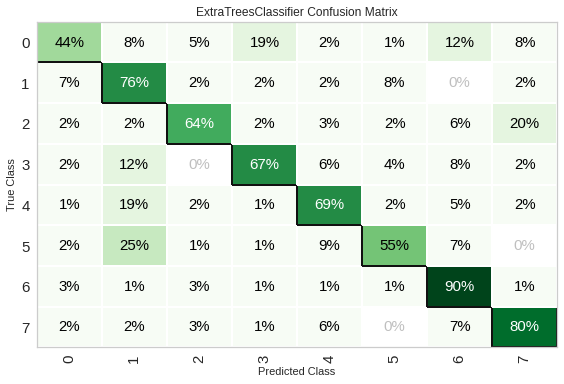

/home/karim/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karim/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/karim/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karim/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

/home/karim/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/karim/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/karim/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/karim/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/karim/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: 

/home/karim/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/karim/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karim/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/karim/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karim/.local/lib/python3.8/site-packages/sklearn/dis

In [13]:
plot_model(tuned_et,plot='confusion_matrix', plot_kwargs = {'percent' : True})

In [13]:
# finalize the model
final_best = finalize_model(tuned_et)# save model to disk
save_model(final_best, 'tuned_et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='gesture',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight={}, criterion='entropy',
                                       max_depth=7, max_features=1.0,
                                       max_leaf_nodes=Non

In [14]:
# predict on hold-out
#X_test_temp = X_test.drop('gesture', axis = 1, inplace = True)
predict_model(tuned_et, raw_score = True, data=X_test_temp)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9367,0.9953,0.9359,0.9370,0.9366,0.9276,0.9277


,32,35,38,40,42,45,47,48,50,51,...,gesture,Label,Score_0,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7
0,1.471502,1.374118,1.374118,1.374118,1.374118,1.321751,1.165568,1.091143,1.085639,1.085639,...,6,6,0.0581,0.0016,0.0057,0.0057,0.0013,0.9273,0.0004,0.0000
1,1.362087,1.362087,1.362087,1.362087,1.362087,1.362087,1.362087,1.362087,1.362087,1.362087,...,5,5,0.0000,0.0000,0.0003,0.1765,0.8152,0.0080,0.0000,0.0000
2,-0.734491,-0.734491,-0.734491,-0.734491,-0.734491,-0.734491,-0.723547,-0.679005,-0.516986,-0.435976,...,5,5,0.0000,0.0000,0.0473,0.0044,0.9273,0.0210,0.0000,0.0000
3,1.320444,1.320444,1.365866,1.471520,1.580077,1.613269,1.613269,1.613269,1.613269,1.613269,...,6,6,0.1334,0.0009,0.0103,0.1164,0.0058,0.7043,0.0168,0.0121
4,-0.842514,-0.851405,-0.851405,-0.851405,-0.851405,-0.851405,-0.851405,-0.851405,-0.851405,-0.851405,...,3,3,0.0003,0.0033,0.9598,0.0003,0.0234,0.0035,0.0093,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,1.322008,1.322008,1.322008,1.322008,1.322008,1.322008,1.322008,1.322008,1.322008,1.322008,...,4,4,0.0000,0.0000,0.0000,0.9735,0.0131,0.0130,0.0000,0.0004
1071,0.447765,0.447765,0.447765,0.447765,0.447765,-0.155361,-0.118639,0.214093,0.208515,0.266617,...,6,6,0.0403,0.0242,0.1094,0.1735,0.0031,0.6460,0.0007,0.0028
1072,-1.488017,-1.437536,-1.427985,-1.427985,-1.427985,-1.414228,-1.378708,-1.360949,-1.349442,-1.349442,...,3,3,0.0009,0.0108,0.9410,0.0013,0.0078,0.0043,0.0243,0.0096
1073,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,-1.215486,...,6,6,0.0433,0.0009,0.0462,0.0031,0.0022,0.8931,0.0112,0.0000


In [ ]:
# # init setup
# from pycaret.classification import *
# clf1 = setup(data = X_train, target = 'gesture')

# # create a model
# lightgbm = create_model('lightgbm')

# predict on new data
predict_model(tuned_et, drift_report = True, data=X_test_temp)

In [1]:
import asyncio
asyncio.set_event_loop(asyncio.new_event_loop())

In [1]:
! python3 -m uvicorn app.main:app --reload

INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [5374] using statreload
Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [5376]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     127.0.0.1:53480 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:53480 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:53512 - "POST /predict?x=-0.16269899&y=0.23185817&z=0.88862506 HTTP/1.1" 200 OK
INFO:     127.0.0.1:53656 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     127.0.0.1:53686 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     127.0.0.1:53700 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     127.0.0.1:53712 - "GET /predict HTTP/1.1" 405 Method Not Allowed
INFO:     127.0.0.1:53712 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:53712 - "GET /predict HTTP/1.1" 405 Method Not Allowed
INFO:     127.0.

In [37]:
to_predict_dict = {'x': -0.16269899,
                   'y': 0.23185817,
                   'z': 0.88862506}

# Apply one-hot encoding
to_predict = np.array(to_predict_dict)

In [38]:
to_predict

array({'x': -0.16269899, 'y': 0.23185817, 'z': 0.88862506}, dtype=object)

In [35]:
import requests
to_predict_dict = {'x': -0.16269899,
                   'y': 0.23185817,
                   'z': 0.88862506}

url = 'http://127.0.0.1:8000/predict'
r = requests.post(url,json=to_predict_dict); r.json()

{'prediction': 'error'}